## ANN using mnist dataset

In [ ]:
import numpy as np                  
import matplotlib.pyplot as plt     
import random                       
from keras.datasets import mnist    
from keras.models import Sequential 
from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils  

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
print(X_train.shape)

(60000, 784)


In [ ]:
print(X_test.shape)

(10000, 784)


In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
print(y_test.shape)

(10000,)


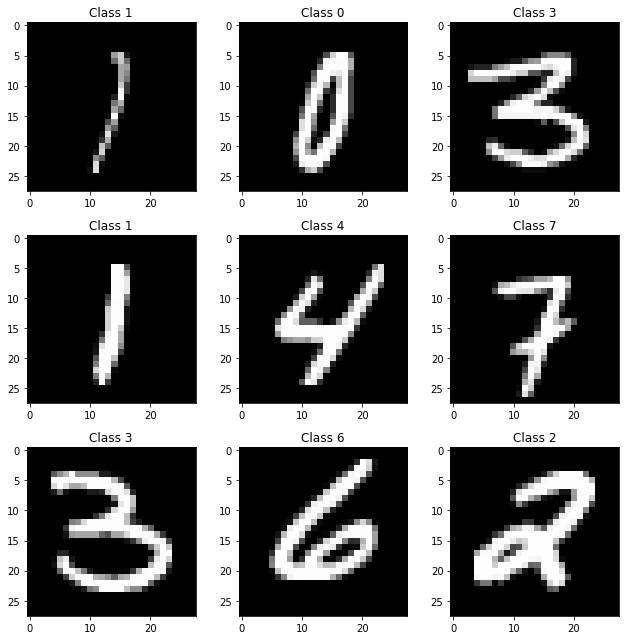

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
def predict(self, X_test):
    predictions = [] 
    for i in range(len(X_test)):
        dist = np.array([euc_dist(X_test[i], x_t) for x_t in   
        self.X_train])
        dist_sorted = dist.argsort()[:self.K]
        neigh_count = {}
        for idx in dist_sorted:
            if self.Y_train[idx] in neigh_count:
                neigh_count[self.Y_train[idx]] += 1
            else:
                neigh_count[self.Y_train[idx]] = 1
        sorted_neigh_count = sorted(neigh_count.items(),    
        key=operator.itemgetter(1), reverse=True)
        predictions.append(sorted_neigh_count[0][0]) 
    return predictions

In [ ]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
    
matprint(X_train[num])

0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0   26  125  211  254  254  254  254  117    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0   31  148  249  253  253  253  253  253  253  250  181  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0   35  112  215  253  253  253  253  253  253  253  253  253  253  0  0  0  0  
0  0  0  0    0    0    0    0    0    0   36  218  253  253  253  253  180  128   19   19  157  253  253  253  0  0  0  0  


In [ ]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
nb_classes = 10 

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()

In [ ]:
# The first hidden layer 
model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [ ]:
model.add(Activation('relu'))

In [ ]:
model.add(Dropout(0.2))

In [ ]:
# The second hidden layer appears 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(10))

In [ ]:
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2519 - accuracy: 0.9239
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.1032 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 9s 20ms/step - loss: 0.0713 - accuracy: 0.9776
Epoch 4/5
469/469 [==============================] - 8s 17ms/step - loss: 0.0586 - accuracy: 0.9808
Epoch 5/5
469/469 [==============================] - 7s 16ms/step - loss: 0.0449 - accuracy: 0.9856


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0636 - accuracy: 0.9808
Test score: 0.06362579762935638
Test accuracy: 0.9807999730110168


## SVM using diabetes dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
url = 'diabetes.csv'
df = pd.read_csv(url) 
df.head()  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
target_names = ['', 'M', 'B']
df['attack_type'] = df.Outcome.apply(lambda x: target_names[x])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,attack_type
0,6,148,72,35,0,33.6,0.627,50,1,M
1,1,85,66,29,0,26.6,0.351,31,0,
2,8,183,64,0,0,23.3,0.672,32,1,M
3,1,89,66,23,94,28.1,0.167,21,0,
4,0,137,40,35,168,43.1,2.288,33,1,M


In [ ]:
df1 = df[df.Outcome == 0]
df2 = df[df.Outcome == 1]

In [ ]:
X = df.drop(['Outcome', 'attack_type'], axis='columns')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y = df.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print(len(X_train))
print(len(X_test))

537
231


In [ ]:
model = SVC(kernel='linear')

In [ ]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = model.predict(X_test)
print(predictions)

[0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 0]


In [ ]:
percentage = model.score(X_test, y_test)

In [ ]:
print(f"Accuracy = {percentage*100} %")

Accuracy = 95.32163742690058 %


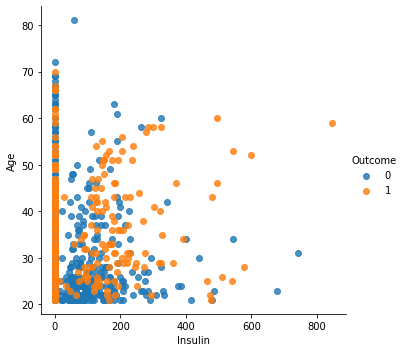

In [ ]:
data_plot = sns.lmplot('Insulin', 'Age', data=df, hue='Outcome', fit_reg=False)


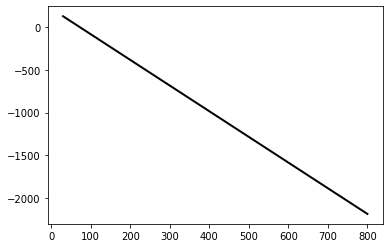

In [ ]:
# Plot the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 800)
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy, linewidth=2, color='black')

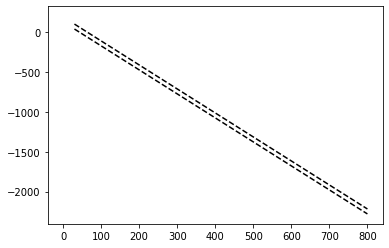

In [ ]:

# Plot the parallels to the hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
           s=80, facecolors='none')
